In [1]:
#Import necessary Libraries

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers.recurrent import LSTM

In [2]:
df = pd.read_csv('LGMVIP-DataScience-2.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [4]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Last,0
Close,0
Total Trade Quantity,0
Turnover (Lacs),0


#Since the date is in descending order, let us reverse the dataframe

In [5]:
df = df.iloc[::-1]

In [6]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [7]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [8]:
df = df.reset_index()

In [9]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [10]:
df.drop(columns = df.columns[0],axis=1,inplace=True)

In [11]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [12]:
df_close = df['Close']

In [13]:
df_close

,Close
0,121.55
1,120.90
2,120.65
3,117.60
4,118.65
...,...
2030,233.30
2031,236.10
2032,234.25
2033,233.25


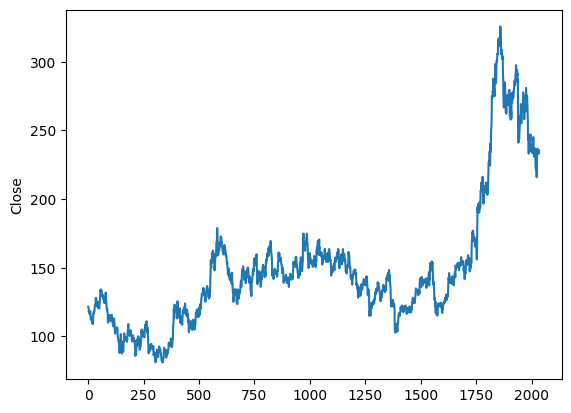

In [14]:
sns.lineplot(data=df_close)
plt.show()

In [15]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [16]:
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [17]:
df.shape

(2035, 8)

In [18]:
training_size = int(len(df1)*0.7)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:] , df1[training_size:len(df1),:1]

In [19]:
training_size, test_size

(1424, 611)

In [20]:
def create(dataset, time_step=1):

	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])

	return np.array(dataX), np.array(dataY)

In [21]:
time_step = 100
X_train, y_train = create(train_data, time_step)
X_test, y_test = create(test_data, time_step)

In [22]:
X_train, y_train

(array([[0.16584967, 0.16319444, 0.1621732 , ..., 0.14011438, 0.13848039,
         0.12479575],
        [0.16319444, 0.1621732 , 0.14971405, ..., 0.13848039, 0.12479575,
         0.12254902],
        [0.1621732 , 0.14971405, 0.15400327, ..., 0.12479575, 0.12254902,
         0.13010621],
        ...,
        [0.18280229, 0.19178922, 0.19219771, ..., 0.16441993, 0.15236928,
         0.15482026],
        [0.19178922, 0.19219771, 0.19281046, ..., 0.15236928, 0.15482026,
         0.15420752],
        [0.19219771, 0.19281046, 0.21058007, ..., 0.15482026, 0.15420752,
         0.15012255]]),
 array([0.12254902, 0.13010621, 0.13541667, ..., 0.15420752, 0.15012255,
        0.15747549]))

In [23]:
X_train.shape, y_train.shape

((1323, 100), (1323,))

In [24]:
X_test.shape, y_test.shape

((510, 100), (510,))

In [25]:
# reshape input to be [samples, time steps, features] which is required for LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
model=Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
pip install tensorflow==2.11.0

In [29]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
21/21 [==============================] - 45s 1s/step - loss: 0.0122 - val_loss: 0.0490
Epoch 2/100
21/21 [==============================] - 10s 471ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 3/100
21/21 [==============================] - 11s 530ms/step - loss: 8.4272e-04 - val_loss: 0.0028
Epoch 4/100
21/21 [==============================] - 11s 529ms/step - loss: 7.4893e-04 - val_loss: 0.0025
Epoch 5/100
21/21 [==============================] - 10s 470ms/step - loss: 7.2152e-04 - val_loss: 0.0023
Epoch 6/100
21/21 [==============================] - 10s 482ms/step - loss: 7.0485e-04 - val_loss: 0.0030
Epoch 7/100
21/21 [==============================] - 11s 531ms/step - loss: 6.9761e-04 - val_loss: 0.0024
Epoch 8/100
21/21 [==============================] - 15s 706ms/step - loss: 6.6269e-04 - val_loss: 0.0024
Epoch 9/100
21/21 [==============================] - 13s 632ms/step - loss: 6.4544e-04 - val_loss: 0.0021
Epoch 10/100
21/21 [==============================] - 11s

In [30]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [31]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
math.sqrt(mean_squared_error(y_train,train_predict))

132.7435025619469

In [33]:
math.sqrt(mean_squared_error(y_test,test_predict))

207.32528170362062

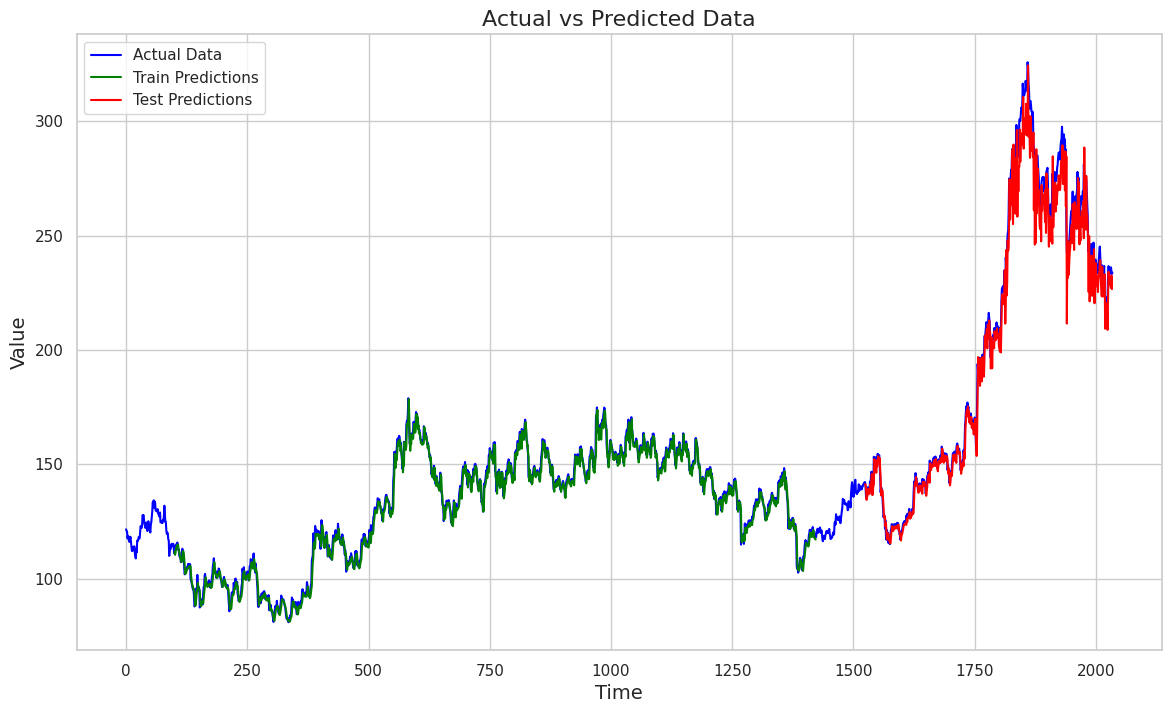

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Apply Seaborn style
sns.set(style="whitegrid")

# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(14, 8))  # Set figure size
plt.plot(scaler.inverse_transform(df1), label='Actual Data', color='blue', linewidth=1.5)
plt.plot(trainPredictPlot, label='Train Predictions', color='green', linewidth=1.5)
plt.plot(testPredictPlot, label='Test Predictions', color='red', linewidth=1.5)

# Add labels and legend
plt.title('Actual vs Predicted Data', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(loc='upper left')

# Show the plot
plt.show()

Hence the model is performing well and has given accurate results